In [2]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
from tensorflow.keras.datasets import mnist

### Data Loading

In [3]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [11]:
(X_train,y_train),(X_val,y_val) = mnist.load_data()

### Data Exploration`

In [12]:
X_train.shape,X_val.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
y_train.shape,y_val.shape

((60000,), (10000,))

In [15]:
import matplotlib.pyplot as plt

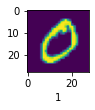

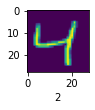

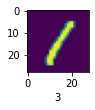

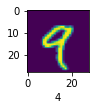

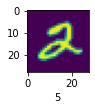

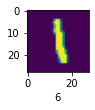

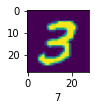

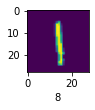

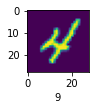

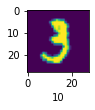

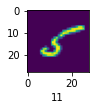

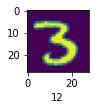

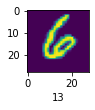

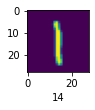

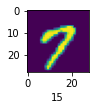

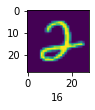

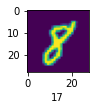

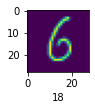

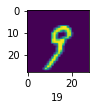

In [32]:
for i in range(1,20):
    plt.figure(figsize=(25,15))
    plt.subplot(1,19,i)
    plt.xlabel(i)
    plt.imshow(X_train[i])

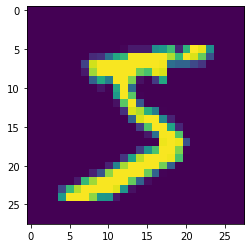

In [17]:
plt.imshow(X_train[0])

### Data Preparation`

###### Flatten the dataset

In [34]:
X_train[0].shape

(28, 28)

In [35]:
28*28

784

In [36]:
X_train =  X_train.reshape(X_train.shape[0],784)
X_val =  X_val.reshape(X_val.shape[0],784)

#### Normalizing the data

In [39]:
X_train = X_train/255.
X_val = X_val/255.

#### Category Encoding for Target

In [42]:
import tensorflow.keras as keras

In [44]:
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [45]:
y_train.shape

(60000, 10)

#### Model Training

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model =  Sequential()
model.add(Dense(512,activation = 'relu', input_shape = (784,)))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [55]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size =1000,epochs = 5)

Epoch 1/5
60/60 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.2128 - val_accuracy: 0.9821
Epoch 2/5
60/60 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.1816 - val_accuracy: 0.9849
Epoch 3/5
60/60 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1786 - val_accuracy: 0.9848
Epoch 4/5
60/60 [==============================] - 0s 5ms/step - loss: 9.8160e-04 - accuracy: 0.9996 - val_loss: 0.1948 - val_accuracy: 0.9847
Epoch 5/5
60/60 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1998 - val_accuracy: 0.9848
